# Page View Time Series Visualizer

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('csv/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

Text(0, 0.5, 'Page Views')

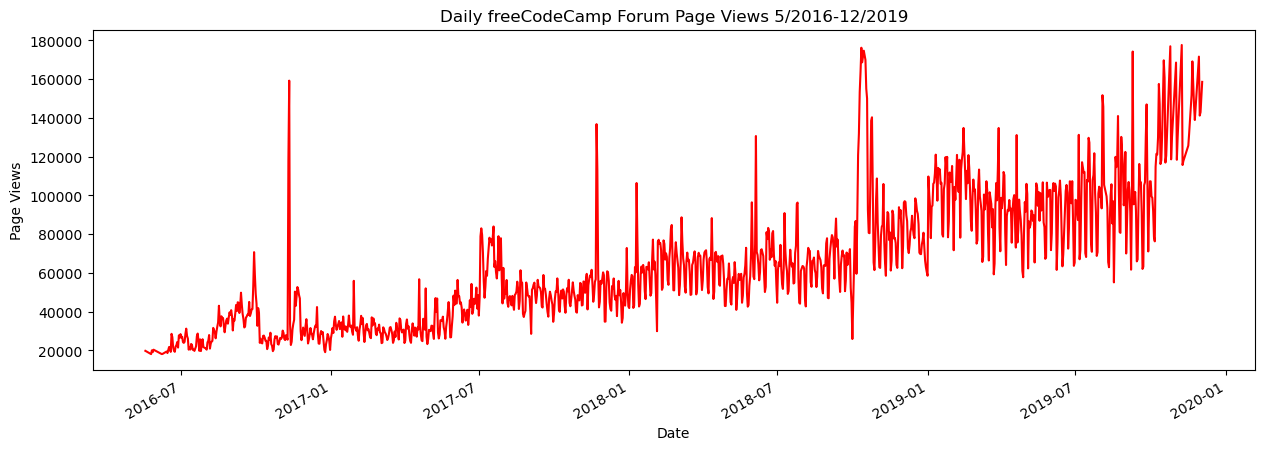

In [27]:
df.plot.line(figsize=(15,5), color='red', legend=False)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019')]

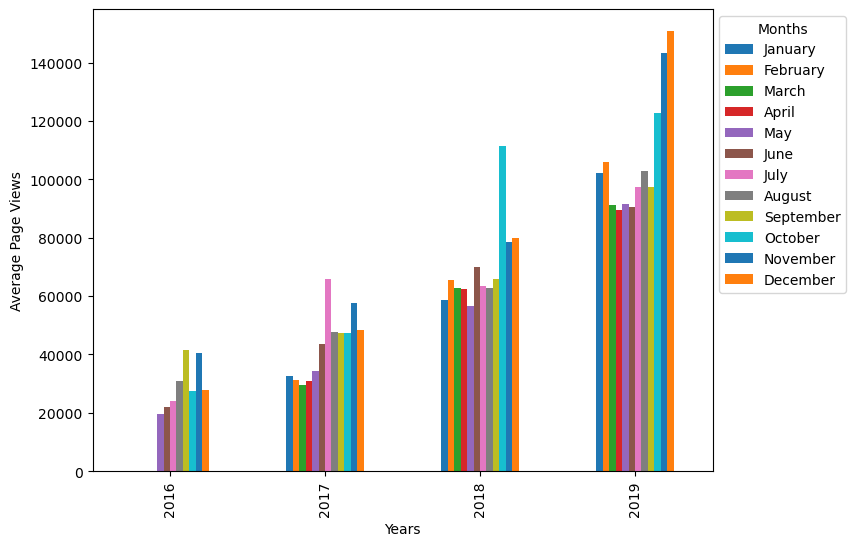

In [28]:
# Group the data by year and month and compute the mean page views
df_bar_group = df.groupby([df.index.year, df.index.month_name()]).mean()['value'].unstack()

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the columns of the DataFrame
df_bar_group = df_bar_group[month_order]

# Draw the bar plot
ax = df_bar_group.plot(kind='bar', legend=True, figsize=(8,6))
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title='Months', bbox_to_anchor=(1, 1))
ax.set_xticklabels(df_bar_group.index.get_level_values(0).unique(), rotation=90)


[Text(0, 0.5, 'Page Views'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

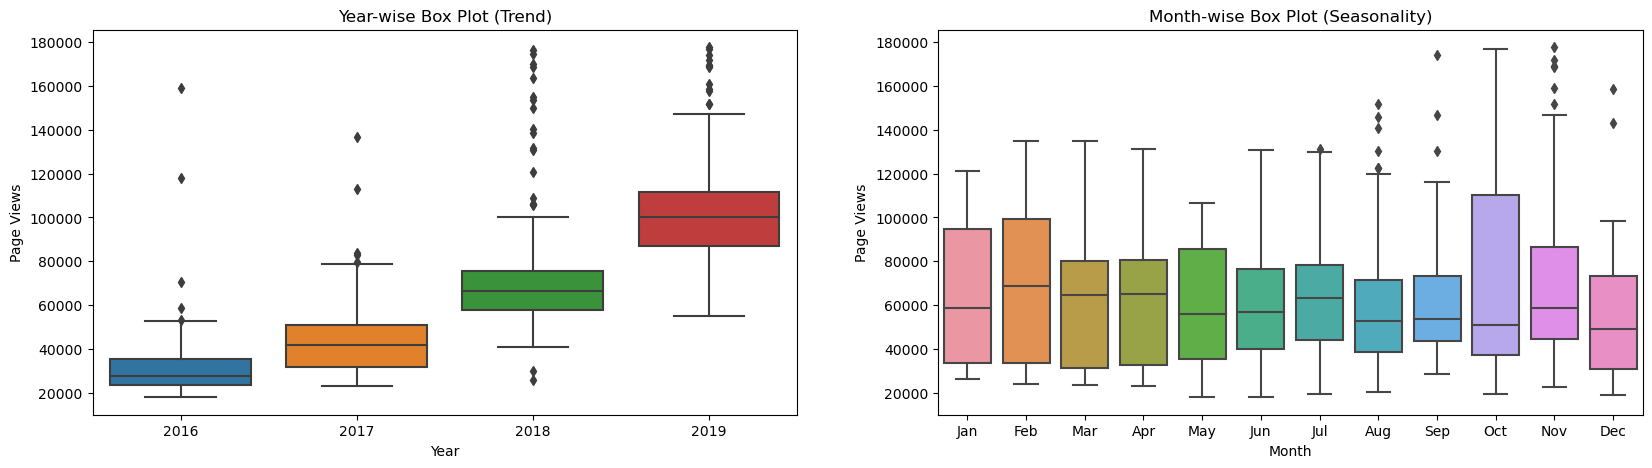

In [29]:
df_box = df.copy()
df_box['year'] = df_box.index.year
df_box['month'] = df_box.index.strftime('%b')

mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order)
ax1.set(ylabel='Page Views', xlabel='Year', title='Year-wise Box Plot (Trend)')
ax2.set(ylabel='Page Views', xlabel='Month', title='Month-wise Box Plot (Seasonality)')
